In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. 
They collected a sample that summarizes the activities of users during the past few months.
You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis
    (Univariate, Bi-variate, and multivariate analysis).

Solution 1.1:

In [2]:
df=pd.read_csv(r'path of csv file')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


From Data Head we can see that there are seven features of credit cards which are being considerer and are as follows:
    1. Amount Spent by customers per month.
    2. Advance Payments made by customers toward monthly bill.
    3. Probability of full payment towards monthly bill.
    4. Current Balance available in the credit card.
    5. Credit Limit for the card.
    6. Minimum amount paid towards monthly bill.
    7. Maximum amount spent in a single usage of the card.

In [4]:
df.shape

(210, 7)

The dataset contains 7 columns and 210 rows. This means we have data of 210 customer's credit card over seven different
attributes .

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


There are no null or missing data in the dataset and all the attributes have data types as float , i.e we are dealing with
numerical values only and no categorical or boolean value is present in the dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


From the data description we can see that there is a wide range of customer behavior over different attributes and the data
is not scaled also.

Text(0.5, 1.0, 'UNIVARIATE BOXPLOT')

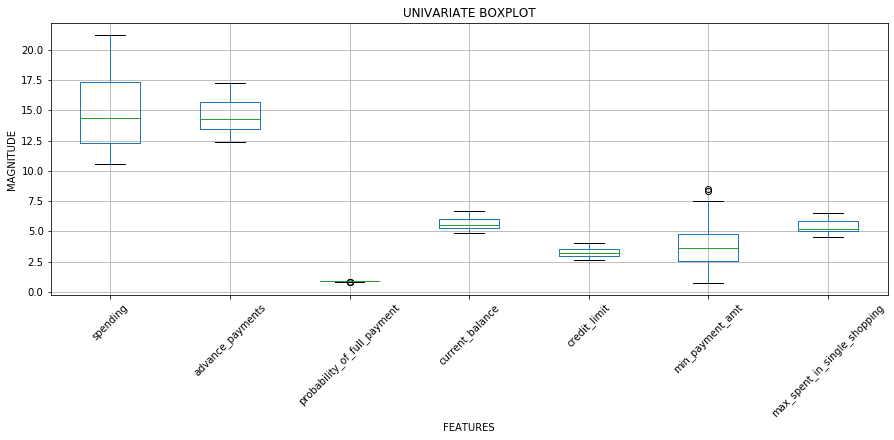

In [7]:
plt.figure(figsize=(15,5))
df.boxplot(rot=45)
plt.xlabel('FEATURES')
plt.ylabel('MAGNITUDE')
plt.title('UNIVARIATE BOXPLOT')


 We can conclude from above Univariate Visualisation that features 'Probability of full payment' and 'Minimum Payment' have
outliers while all the other features have data well within the Upper and Lower Inter Quartile Range.

Text(0.5, 1, 'BIVARIATE PAIRPLOT')

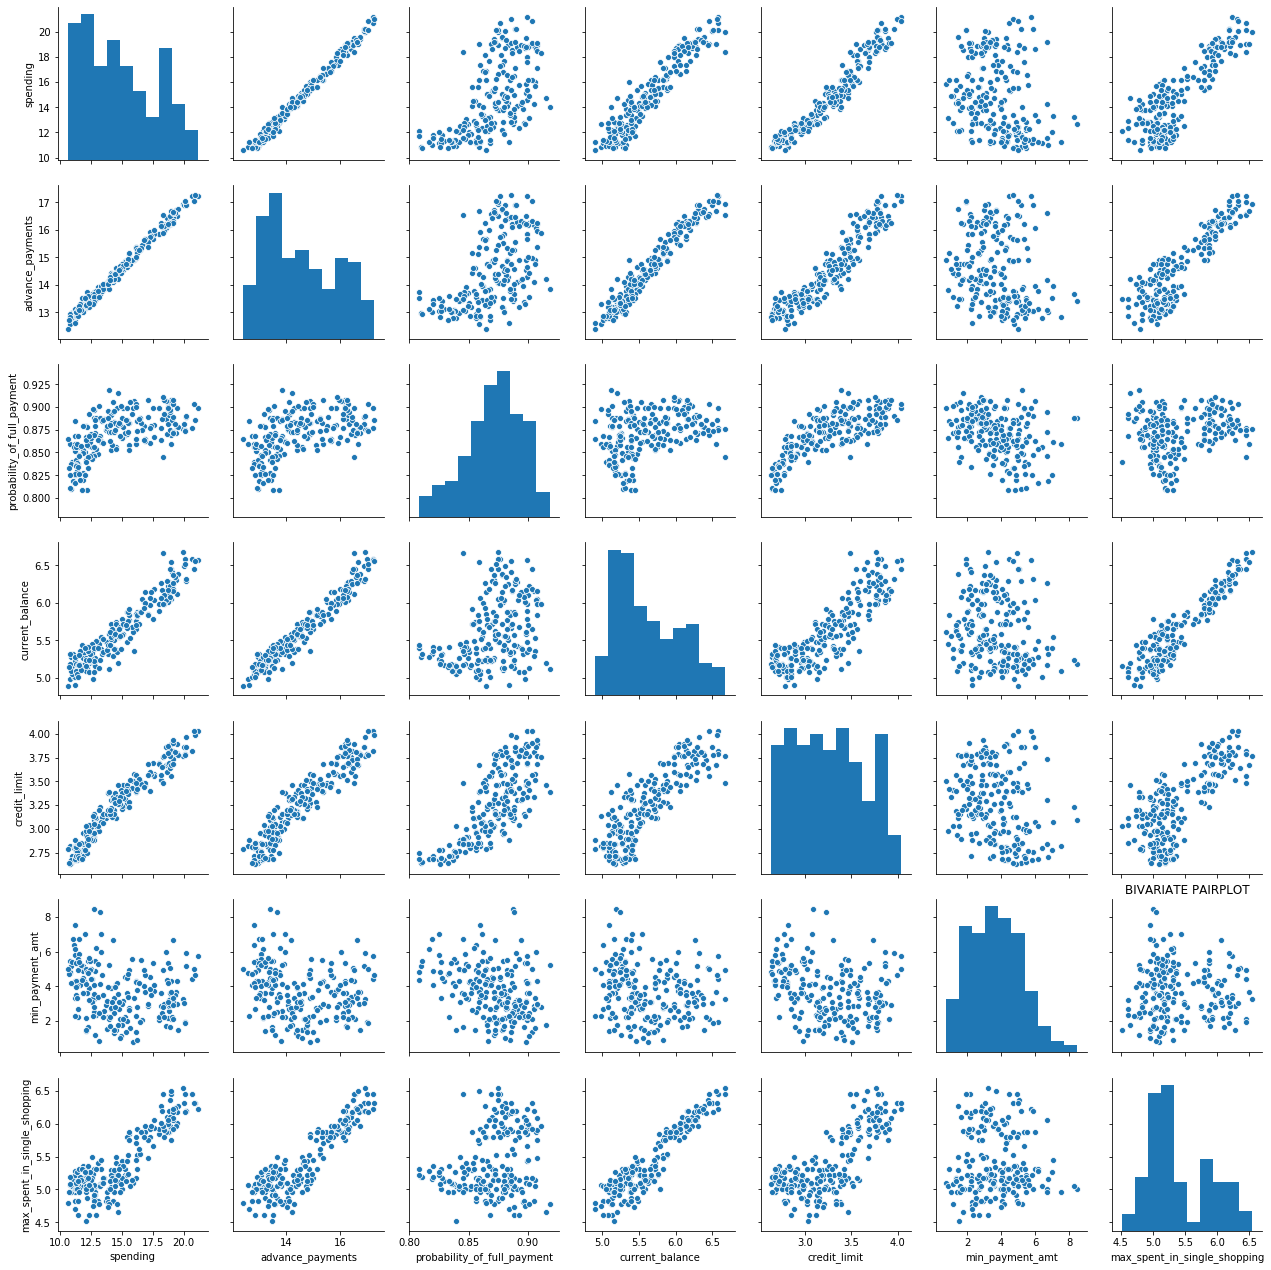

In [8]:
sns.pairplot(df)
plt.title('BIVARIATE PAIRPLOT')

We can deduce from above Bivariate visualisation that except feature 'Minimum Payment Amount' all the other features have a
close to linear relationship or data is close to Normal Distribution

Text(0.5, 1, 'Correlation Map')

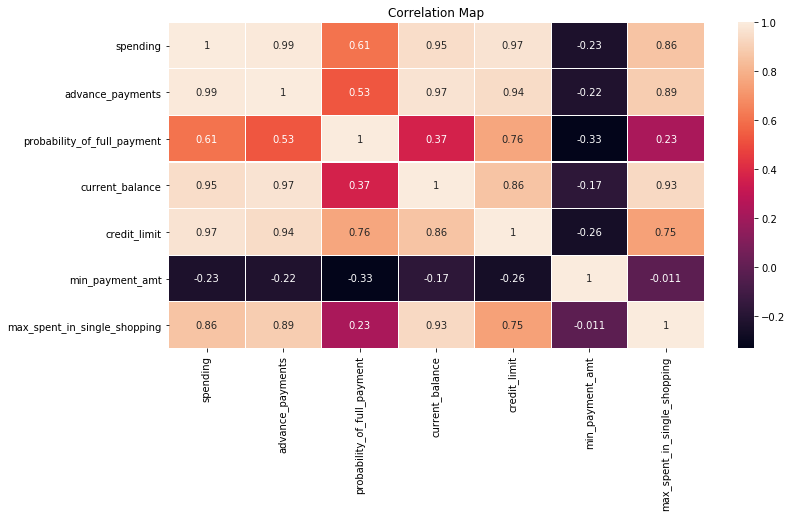

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot=True ,linewidth=0.2)
plt.title('Correlation Map')

We can see from the abouve visualisation that features are higly correlated .
Spending and Advance Payments have the highest correlation of 0.99. 

In [10]:
Skew_value = df.skew(axis=0)

In [11]:
print('The skewness in the features have the following values:' ,'\n', Skew_value)

The skewness in the features have the following values: 
 spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64


We can see from the above table that feature ' Probability of full payment' has negative skewness which implies that it is
asymetrical and left tailed distribution whereas all the other features have positive skewness implying that they are
asymmetrical but right tailed distribution.

Checking Outliers

In [12]:
def treat_outlier(x):
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    IQR=q75-q25
    UR=q75+(1.5*IQR)
    LR=q25-(1.5*IQR)
    return UR ,LR

In [13]:
# for feature in df[['spending' ,'advance_payments',
#                    'probability_of_full_payment',
#                    'current_balance',
#                    'credit_limit' ,
#                    'min_payment_amt',
#                    'max_spent_in_single_shopping' ]]:
#     LR,UR= treat_outlier(df[feature])
    
    


1.2  Do you think scaling is necessary for clustering in this case? Justify

Solution 1.2:

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


We can conclude from the above table that data is not scalled as:
    1. std ranges from 0.02 to 2.90
    2. Min value variation is all the way from 0.76 to 10.59.
    3. Mean values are highly different.
    4. Max values variation is high.
    
All the features are on different scale and therefore it is neccessary to perform scalling on the dataset before performing
hierarchichal cliustering.
We can use standard scaller or zscore method for scalling.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc= StandardScaler()

In [17]:
df_scaled= sc.fit_transform(df)

1.3 Apply hierarchical clustering to scaled data. 
Identify the number of optimum clusters using Dendrogram and briefly describe them

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
wardlink= linkage (df_scaled , method='ward')

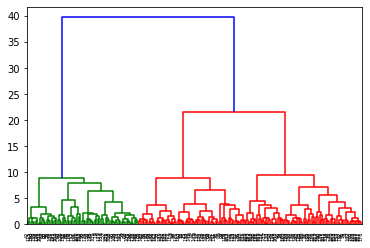

In [20]:
dend=dendrogram(wardlink)

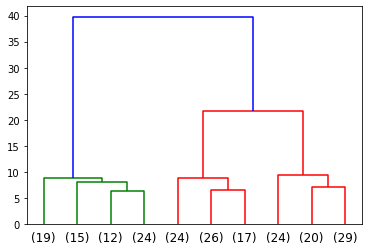

In [21]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters = fcluster(wardlink, 15, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
df['clusters']=clusters

In [25]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [26]:
df.to_excel('Bank_Data_mining_project.xlsx')

We have performed Hierarchichal clustering here using Ward's Linkage method. This is a unsupervised learning technique.
Ward's linkage method joins records and clusters together progressively to produce larger and larger clusters.

From the dendrogram we can observe that dataset has been divided into 3 categories broadly and therefore using 'Distance' 
method we have formed 3 clusters, we have chosen distance as 15 as it gives the best classification if we cut the 
dendrogram at dist=15 . Th perpendicular line will cut at 3 different points of dendrogram thus we shall do the clustering
in 3 groups. We shall not select 2 clusters as it will not give us a detailed insight into the dataset .We already have
2 broad categories of high spenders and low spenders and thus we need to find some pattern between them and therefore
we shall classify our dataset into 3 clusters.

The following insights can be drawn from the clustered dataset:
    1. Cluster 1 contains 71 customers out of 210 with average spending of Rs 18,371/- and mean credit limit of
       Rs 36,846/-.
    2. Cluster 2 contains 68 customers out of 210 with mean spending of Rs 11,872/- and mean credit limit of
       Rs 28,485/.
    3. Cluster 3 contains 74 customers out of 210 with mean spending of Rs 14,199/- and mean credit limit of 
       Rs 32,264/.
       
Therefore we can conclude that out of the customer data set Cluster 1 contains premium customers availing a high credit 
limit and high spending as well. Cluster 2 contains the customers with the lowest credit limit and spending and cluster
3 contains medium group customers . Bank can use this information to provide various facilities such as enhancement
of credig limit for cluster 2 customers in accordance with the income or maybe an add on card for cluster 1 customers.
Similarly cluster 3 customers can be mobilised to higher clusters by encouraging them to avail a card of higher limit
and various promotional schemes to enhance the spendings which will ultimately contribute to Bank's Interest Income.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters.
    Apply elbow curve and silhouette score. Explain the results properly.
    Interpret and write inferences on the finalized clusters.

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score , silhouette_samples

In [28]:
X= StandardScaler()

In [29]:
scaled_df= X.fit_transform(df)

In [30]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ..., -0.29880602,
         2.3289982 , -1.22932588],
       [ 0.39358228,  0.25383997,  1.501773  , ..., -0.24280501,
        -0.53858174,  1.19469699],
       [ 1.41330028,  1.42819249,  0.50487353, ..., -0.22147129,
         1.50910692, -1.22932588],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -1.3221578 ,
        -0.83023461,  1.19469699],
       [ 0.43836719,  0.33827054,  1.23027698, ..., -0.95348449,
         0.07123789, -1.22932588],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.70681338,
         0.96047321,  1.19469699]])

In [31]:
KM= KMeans(n_clusters=1 , random_state=1)
KM.fit(scaled_df)
KM.inertia_

1679.9999999999984

In [32]:
KM= KMeans(n_clusters=2 , random_state=1)
KM.fit(scaled_df)
KM.inertia_

726.6698839310624

In [33]:
KM= KMeans(n_clusters=3 , random_state=1)
KM.fit(scaled_df)
KM.inertia_

442.4523711584221

In [34]:
KM= KMeans(n_clusters=4 , random_state=1)
KM.fit(scaled_df)
KM.inertia_

392.1513451875943

In [35]:
wss=[]

for i in range(1,11):
    KM= KMeans(n_clusters=i , random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    

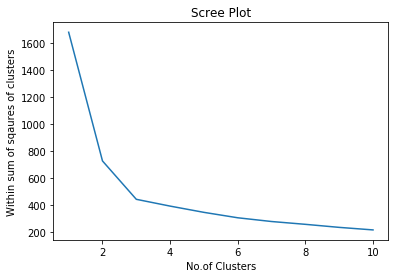

In [36]:
plt.title('Scree Plot')
plt.xlabel('No.of Clusters')
plt.ylabel('Within sum of sqaures of clusters')
plt.plot(range(1,11) , wss)
plt.show()

We can clearly visualise from the above scree plot that there is no significant decrease in sum of squares between the clusters
between 3 no. of clusters to 4 no of clusters and therefore we shall form 3 clusters and try to find insights from the dataset.

Taking no. of clusters = 3 and attaching the clusters to the original Dataset

In [37]:
KM= KMeans(n_clusters=3 , random_state=1)
KM.fit(scaled_df)
KM.inertia_

df['KMEANS_Clust']=KM.labels_

In [38]:
df.drop('clusters' , axis=1).head() #dropping cluster column ,added while performing hierarchichal clustering.

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMEANS_Clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [39]:
df.to_excel('data_mining_assingnment_Kmeans.xlsx')

Now we shall find out silhouette score and check how has our model performed.

In [40]:
 silhouette_score(scaled_df ,KM.labels_)

0.47338992675469077

In [41]:
silhouette_samples(scaled_df ,KM.labels_).min()

0.00979164002293305

We see that our silhouette_score is 0.47 which is positive and close to 50% , also none of the silhouette samples have a 
negative value thus our dataset has been mapped correctly to the clusters and the model is acceptable.

1.5 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Sol 1.5


Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency.
The management decides to collect data from the past few years. 
You are assigned the task to make a model which predicts the claim status and provide recommendations to management. 
Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps,
    and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [43]:
df1= pd.read_csv(r'path of csv file')

In [44]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
df1.shape

(3000, 10)

In [46]:
df1.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [48]:
# From above info we have the following information:
#     1. Integer or float features: Age ,Commision , Duration ,Sales.
#     2. Object type : Agency_code , Type , Claimed , Channel, Product Name , Destination,

#We are required to do label encoding for object data type.

In [49]:
df1.head()

#We can see that all the object dtypes have ben encoded as numerical values now.

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [50]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [51]:
dups = df1.duplicated()
print(dups.sum())
df1[dups]

139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [52]:
df1.drop_duplicates(inplace=True)

df1.shape

(2861, 10)

In [53]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861,NaN,NaN,NaN,38.2041,10.6781,8,31,36,43,84
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861,NaN,NaN,NaN,15.081,25.8268,0,0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861,NaN,NaN,NaN,72.1202,135.977,-1,12,28,66,4580
Sales,2861,NaN,NaN,NaN,61.7579,71.3997,0,20,33.5,69.3,539
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for column in df1:
    print(column, ':' , df1[column].nunique(), '\n') 

Age : 70 

Agency_Code : 4 

Type : 2 

Claimed : 2 

Commision : 324 

Channel : 2 

Duration : 257 

Sales : 380 

Product Name : 5 

Destination : 3 



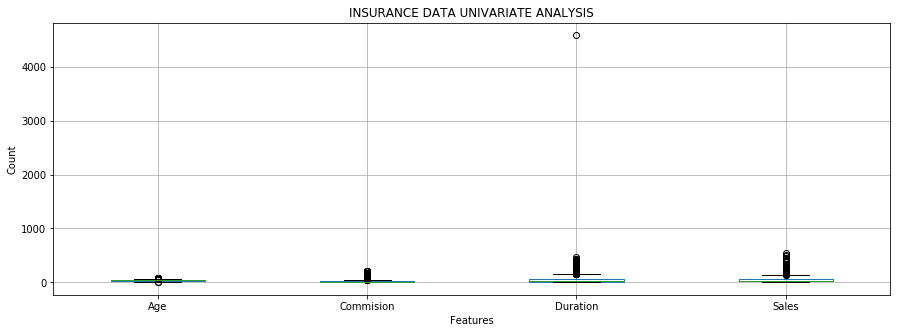

In [55]:
#Checking Outlier for continuos variables

plt.figure(figsize=(15,5))
df1[['Age' ,'Commision', 'Duration' , 'Sales']].boxplot()
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('INSURANCE DATA UNIVARIATE ANALYSIS')
plt.show()



In [56]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [57]:
#Segregating continuos features 
df1_num= df1[['Age' , 'Commision' , 'Duration' , 'Sales']]
df1_num.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


In [58]:
df1_num.columns

Index(['Age', 'Commision', 'Duration', 'Sales'], dtype='object')

In [59]:
for i in df1_num.columns:
    LL, UL = replace_outlier(df1_num[i])
    df1_num[i] = np.where(df1_num[i]> UL, UL, df1_num[i])
    df1_num[i] = np.where(df1_num[i]< LL, LL, df1_num[i])

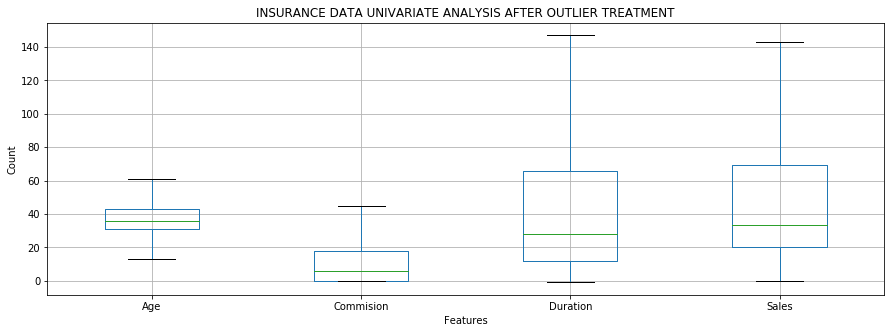

In [60]:
plt.figure(figsize=(15,5))
df1_num[['Age' ,'Commision', 'Duration' , 'Sales']].boxplot()
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('INSURANCE DATA UNIVARIATE ANALYSIS AFTER OUTLIER TREATMENT')
plt.show()

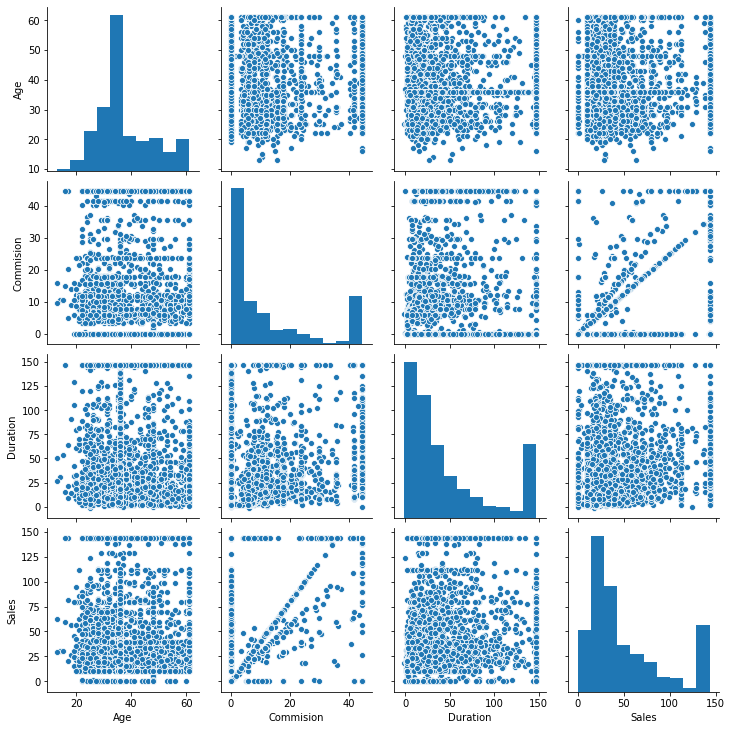

In [61]:
sns.pairplot(df1_num[['Age' ,'Commision', 'Duration' , 'Sales']])
plt.show()

In [62]:
#We can see from above BIVARIATE ANALYSIS that Sales and Duration have linear relation only and
#none of the other features have linearity. 

#This implies that with higher commision there is more sales in the insurance market place.

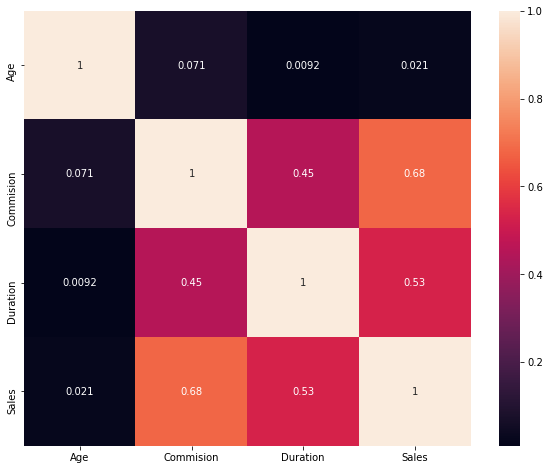

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df1_num.corr(), annot=True)
plt.show()

In [64]:
#Again we can conclude from heatmap that Sales and commision have a high co-relation .

In [65]:
#Label Encoding the object data features.

df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [66]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [67]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [68]:
df1.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

Thus we can see there is no issue of class imbalance .

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [69]:
X= df1.drop('Claimed', axis=1)

Y= df1.pop('Claimed')

In [70]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [71]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [72]:
#Splitting the data into train and test dataset

from sklearn.model_selection import train_test_split

X_train , X_test , train_labels , test_labels= train_test_split(X , Y , test_size=0.30 , random_state=1)

In [73]:
#checking the dimemsions of the split data

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [74]:
#Building a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [30,50,80], # 1-3% 
    'min_samples_split': [90,150,240]}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 4)

In [75]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 240}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=240)

In [76]:
#Generating Tree

from sklearn import tree


train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

The Decision Tree is shown below :
    
    The tree is not overgrown and pruning is not required.

In [77]:
#Variable Importance

print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.576990
Sales         0.295112
Product Name  0.045506
Commision     0.043557
Duration      0.025640
Age           0.013195
Type          0.000000
Channel       0.000000
Destination   0.000000


In [78]:
#Therefore we can conclude that Agency_code which is selling the insurance products is the most important feature used by
# by the model for prediction of claim status.


In [79]:
#Predicting on training and testing dataset.

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [80]:
#Getting the Probabilities

ytrain_predict_prob=best_grid.predict_proba(X_train)
ytest_predict_prob=best_grid.predict_proba(X_test)

In [81]:

ytest_predict_prob

array([[0.57317073, 0.42682927],
       [0.97122302, 0.02877698],
       [0.27411168, 0.72588832],
       ...,
       [0.53846154, 0.46153846],
       [0.88479263, 0.11520737],
       [0.72222222, 0.27777778]])

In [82]:
ytrain_predict_prob

array([[0.84722222, 0.15277778],
       [0.67241379, 0.32758621],
       [0.8375    , 0.1625    ],
       ...,
       [0.94835681, 0.05164319],
       [0.57317073, 0.42682927],
       [0.57317073, 0.42682927]])

AUC: 0.816


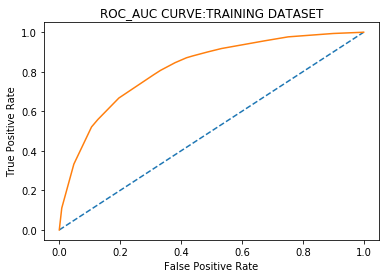

In [84]:
#Model Evaluation
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

#AUC and ROC for the training data
probs = ytrain_predict_prob[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TRAINING DATASET')
plt.show()

AUC: 0.792


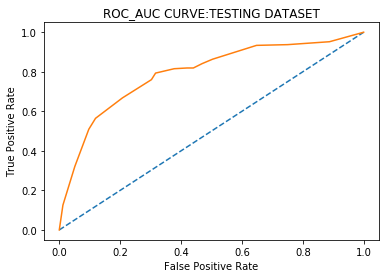

In [85]:
#AUC and ROC for the testing data
probs = ytest_predict_prob[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TESTING DATASET')
plt.show()

In [86]:
# We can see that training model has performed slightly better that testing model as per the roc_auc_score but since 
# the variation among both is minimal the model is acceptable.

In [87]:
#Accuracy for training dataset

cart_train_acc = roc_auc_score(ytrain_predict,train_labels)
cart_train_acc

0.7485706296083573

In [88]:
cart_test_acc = roc_auc_score(ytest_predict,test_labels)
cart_test_acc

0.7536955514365153

In [89]:
# Both the datasets have accuracy close to 75% and thus over model does not seem to be overfitted or underfitted.

In [90]:
#Confusion_Matrix for training dataset

confusion_matrix(ytrain_predict,train_labels)

array([[1215,  308],
       [ 144,  335]], dtype=int64)

In [91]:
#Confusion Matrix for test dataset

confusion_matrix(ytest_predict,test_labels)

array([[531, 133],
       [ 57, 138]], dtype=int64)

In [92]:
#Classification Report for training dataset

print(classification_report(ytrain_predict, train_labels))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1523
           1       0.52      0.70      0.60       479

    accuracy                           0.77      2002
   macro avg       0.71      0.75      0.72      2002
weighted avg       0.80      0.77      0.78      2002



In [93]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.52
cart_train_f1  0.6


In [94]:
#Classification Report for testing datset


print(classification_report(ytest_predict, test_labels))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       664
           1       0.51      0.71      0.59       195

    accuracy                           0.78       859
   macro avg       0.71      0.75      0.72       859
weighted avg       0.81      0.78      0.79       859



In [95]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.71
cart_train_recall  0.51
cart_train_f1  0.59


#From the above Evaluations we can again conclude that the evaluation values are close to same for both the train and test
datasets therefore we can accept the model as it is having acceptable range of accuracy is neither overfitted nor underfitted.

RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [10],
    'max_features': [7],
    'min_samples_leaf': [30],
    'min_samples_split': [240],
    'n_estimators': [100]}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 4)

In [97]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [7],
                         'min_samples_leaf': [30], 'min_samples_split': [240],
                         'n_estimators': [100]})

In [98]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 240,
 'n_estimators': 100}

In [99]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=30,
                       min_samples_split=240)

In [100]:
#Predicting the Training and Testing data

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [101]:
#RF Model Performance Evaluation on Training data

confusion_matrix(train_labels,ytrain_predict)


array([[1190,  169],
       [ 304,  339]], dtype=int64)

In [102]:
ytrain_predict_prob=best_grid.predict_proba(X_train)
ytest_predict_prob=best_grid.predict_proba(X_test)

AUC: 0.814


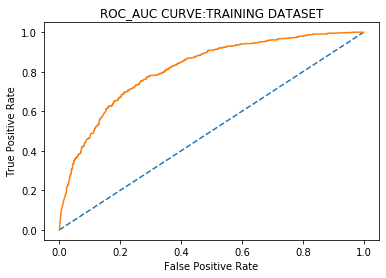

In [103]:
#AUC and ROC for the training data
probs = ytrain_predict_prob[:, 1]
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TRAINING DATASET')
plt.show()

In [104]:
#Checking accuracy of the model on training dataset

rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7637362637362637

In [105]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1359
           1       0.67      0.53      0.59       643

    accuracy                           0.76      2002
   macro avg       0.73      0.70      0.71      2002
weighted avg       0.76      0.76      0.76      2002



In [106]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.67
rf_train_recall  0.53
rf_train_f1  0.59


In [107]:
#RF Model Performance Evaluation on Test data

confusion_matrix(test_labels,ytest_predict)


array([[519,  69],
       [126, 145]], dtype=int64)

AUC: 0.816


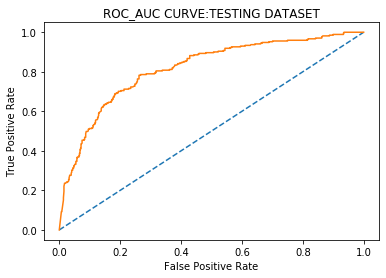

In [108]:
#AUC and ROC for the testing data
probs = ytest_predict_prob[:, 1]
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
rf_test_fpr,rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr,rf_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TESTING DATASET')
plt.show()

In [109]:
#Checking accuracy of the model on test dataset

rf_test_acc=best_grid.score(X_test,test_labels) 
rf_test_acc

0.7729918509895227

In [110]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       588
           1       0.68      0.54      0.60       271

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [111]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.54
rf_test_f1  0.6


In [112]:

#From the above Evaluations we can again conclude that the evaluation values are close to same 
#for both the train and test datasets therefore we can accept the model 
#as it is having acceptable range of accuracy is neither overfitted nor underfitted.

In [113]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.520185
Sales         0.201508
Product Name  0.179085
Commision     0.049833
Duration      0.031974
Age           0.011785
Destination   0.004970
Type          0.000659
Channel       0.000000


In [114]:
#This model also concludes that Agency_code is the most important feature for claim prediction.

In [115]:
#Building an Artificial Neural Network Model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [116]:
from sklearn.neural_network import MLPClassifier


param_grid = {
    'hidden_layer_sizes': [100,100], 
    'max_iter': [2000], 
    'solver': ['sgd'], 
    'tol': [0.01], }

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 4)

In [117]:
grid_search.fit(X_train_scaled, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2000, 'solver': 'sgd', 'tol': 0.01}

In [118]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, solver='sgd', tol=0.01)

In [119]:
#Predicting the Training and Testing data

ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

In [120]:
#Getting the probabilities

ytrain_predict_prob=best_grid.predict_proba(X_train)
ytest_predict_prob=best_grid.predict_proba(X_test)

In [121]:
#Evaluating the model for training dataset

AUC: 0.700


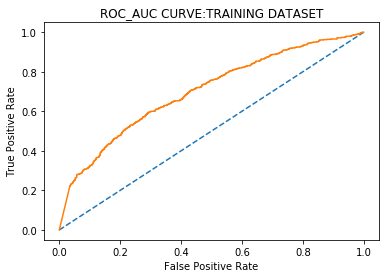

In [122]:
probs = ytrain_predict_prob[:, 1]
nn_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nn_train_auc)
nn_train_fpr,nn_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nn_train_fpr,nn_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TRAINING DATASET')
plt.show()

In [126]:
#Checking accuracy of the model on training dataset

nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.5569430569430569

In [127]:
confusion_matrix(train_labels,ytrain_predict)

array([[1258,  101],
       [ 398,  245]], dtype=int64)

In [128]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1359
           1       0.71      0.38      0.50       643

    accuracy                           0.75      2002
   macro avg       0.73      0.65      0.66      2002
weighted avg       0.74      0.75      0.73      2002



In [129]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.38
nn_train_f1  0.5


In [130]:
#Evaluating the model for testing dataset

AUC: 0.683


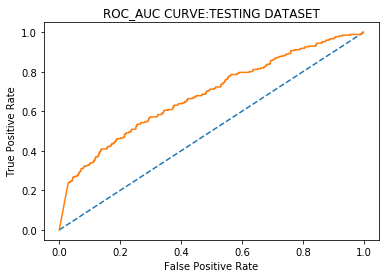

In [131]:
probs = ytest_predict_prob[:, 1]
nn_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nn_test_auc)
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nn_test_fpr, nn_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE:TESTING DATASET')
plt.show()

In [132]:
nn_test_acc=best_grid.score(X_test,test_labels) 
nn_test_acc

0.5471478463329453

In [133]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  41],
       [170, 101]], dtype=int64)

In [134]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       588
           1       0.71      0.37      0.49       271

    accuracy                           0.75       859
   macro avg       0.74      0.65      0.66       859
weighted avg       0.75      0.75      0.73       859



In [135]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.37
nn_test_f1  0.49


In [136]:
#From the above Evaluations we can again conclude that the evaluation values are close to same 
#for both the train and test datasets therefore we can accept this model 
#as well since it is having acceptable range of accuracy is neither overfitted nor underfitted.

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [155]:
#Comparison of the performance metrics from the 3 models

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
df1_comparison = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(df1_comparison,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.75,0.75,0.76,0.77,0.56,0.55
AUC,0.82,0.79,0.81,0.82,0.70,0.68
Recall,0.52,0.51,0.53,0.54,0.38,0.37
Precision,0.70,0.71,0.67,0.68,0.71,0.71
F1 Score,0.60,0.59,0.59,0.60,0.50,0.49


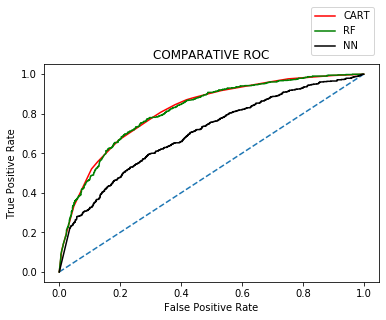

In [156]:
#ROC Curve for the 3 models on the Training data

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('COMPARATIVE ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

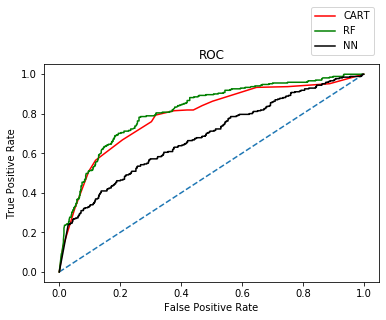

In [157]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

We have compared all the three models based on the following 5 performance metrics:
    1. AUC
    2. F1 score
    3. Recall
    4. Precision
    5. Accuracy
    
Out of the above 5 parameters RF model has outperformed the other two in all the parameters except precision. The same is
visualised through AUC curve as well , therefore we conclude that RF model is the most optimised prediction model we have for 
the present case.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.

The following inferences and recommendations can be put forward to the insurance company's management:

The Business objective here is to reduce Claim frequency and improve sales:

1. We have initially analysed that Agency_code i.e firms providing tour packaged have a high importance in claim status.
A detailed analysis of claim per Agency can be worked out and products can be limited or modified to agencies rendering
high claim in order to cover the settlement cost.

2. There is a close to linear relation between comission and sales which is a clear indicator that insurance lead generators who make a good amount
of sales earn high comission , management can work out some schemes or added benefits for sales people to motivate them
and induce a sense of competition among them to achieve higher and higher sales.

3.The cases where prediction is False Positive can be looked closely and the reason for decline of claim settlement could
be studied and improved to provide customer satisfaction and retention.

4. Other features like Age and Destination can be grouped into Low , Medium and High Risk category and subsequent pricing
   could be done in order to limit the risk and reduce claims.
    
5.In order to reduce claims ,the False Negative cases have to be minimised in order to improme model accuracy.